
# Multiresolution Chemistry made easy (through Vampyr)



## 1 Vampyr prologue

import the packages like so

In [2]:
from vampyr import vampyr3d as vp
import matplotlib.pyplot as plt
import numpy as np

If you want to find out how to use a function, or what we have in the package use the function below

In [3]:
help(vp.ScalingProjector)

Help on class ScalingProjector in module vampyr._vampyr.vampyr3d:

class ScalingProjector(pybind11_builtins.pybind11_object)
 |  Method resolution order:
 |      ScalingProjector
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __call__(...)
 |      __call__(*args, **kwargs)
 |      Overloaded function.
 |      
 |      1. __call__(self: vampyr._vampyr.vampyr3d.ScalingProjector, func: mrcpp::RepresentableFunction<3>) -> mrcpp::FunctionTree<3>
 |      
 |      2. __call__(self: vampyr._vampyr.vampyr3d.ScalingProjector, func: Callable[[List[float[3]]], float]) -> mrcpp::FunctionTree<3>
 |  
 |  __init__(...)
 |      __init__(*args, **kwargs)
 |      Overloaded function.
 |      
 |      1. __init__(self: vampyr._vampyr.vampyr3d.ScalingProjector, mra: mrcpp::MultiResolutionAnalysis<3>, prec: float) -> None
 |      
 |      2. __init__(self: vampyr._vampyr.vampyr3d.ScalingProjector, mra: mrcpp::MultiResolutionAnalysis<3>, scale: int)

In case the help was not enough, ask **us** for help. For this you need only your voice.


## 2 Math in Vampyr

The following exercises are introductions in working with functions, application of operators and some equation solving. 


### 2.1 Projecting a function

In this task you will create a function, project it at different precisions and basis orders, and plot it against its projection. 
This is meant to give you understanding in how one can approach completeness in multiwavelets.

First we start by initializing the multiresolution analysis (mra) by using the following command

In [4]:
mra = vp.MultiResolutionAnalysis(box=[-1,1], order=3)

Here you will change the `order` value later. This defines the polynomial order of the basis.

An allowed function for projection in vampyr needs to have a single coordinate argument and it has to output a float value. You will construct a gaussian function defined by 
\begin{align}
f(\mathbf{r}) = \beta \exp(-\alpha[r_x^2 + r_y^2 + r_z^2])
\end{align}
the alpha value is a measure of how sharp the gaussian function is, and the beta is just a normalization factor, for this exercise you can set it to anything.
Fill out the following python function for this

In [5]:
def f(r):
    alpha = 100
    beta = ((2*alpha/np.pi))**(3/4)
    return beta*np.exp(-alpha*((r[0])**2 + r[1]**2 + r[2]**2))


You should then be able to plot this function by running the next cell

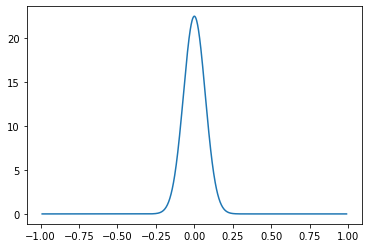

In [6]:
r_x = np.linspace(-0.99, 0.99, 1000) # create an evenly spaced set of points between -0.99 and 0.99
r_y = np.zeros(1000)
r_z = np.zeros(1000)
r = [r_x, r_y, r_z]

plt.plot(r_x, f(r))


Now we want to project this function, the way we do that is by creating a projection operator `vp.ScalingProjector` and apply it on the function. We apply this operator by using the function as a function argument of it, `P(f)` for example.

Try creating one and project the function you created earlier.

hint: use the `help` function to fill out the blanks)

In [7]:
### write your code here
P_eps = vp.ScalingProjector(mra, prec=1.0e-4)

f_tree =  P_eps(f)  # <-- here is where you will put the projected function

when you are done you can run the following cell to plot your projected function. 

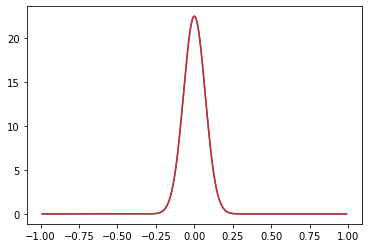

In [8]:
f_plt = [ f_tree([x, 0.0, 0.0]) for x in r_x ]
plt.plot(r_x, f(r), "tab:blue") # your function
plt.plot(r_x, f_plt, "tab:red") # your projected function

Now that you have projected the function, try changing three values, the `alpha` value of your original function, the `order` of the basis and the precision (`prec`) at which you project the function. What you should see is that the sharper the function, the higher order and precision you need to represent it properly. 

One last thing I need to point out before we go to the next exercise is that it is convention to call our projected functions trees, as they all are `vp.FunctionTree` type.


### 2.2 Arithmethic

Arithmethic in vampyr is mostly the same as in normal python.
Lets work with the previous function you created.


First you can normalize your projected function by calling the function `normalize()` of `f_tree`.
Try it in the next cell

In [9]:
f_tree.normalize()

Before we go on into the rest of the exercise, it is important to note that whenever a function is shown, and it doesn't start with `vp.`, it is assumed that it must be called as a member function of the tree, that is `f_tree.normalize()`, otherwise all functions must be called by using the `vp.` prefix.

Start by multiplying it by a factor of $2$ and assigning it to a new tree `g_tree`

In [10]:
g_tree = f_tree*2  # <--- assign your rescaled function to this

You should be able to compare it against `f_tree` by runnning the following cell

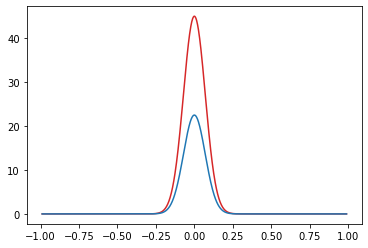

In [11]:
g_plt = [ g_tree([x, 0.0, 0.0]) for x in r_x ]
plt.plot(r_x, g_plt, "tab:red")
plt.plot(r_x, f_plt, "tab:blue")

try adding `f_tree` and `g_tree` together

In [12]:
h_tree = f_tree + g_tree # <--- assign your added functions to this

again, you can test this by plotting it against the two other functions by running the following cell

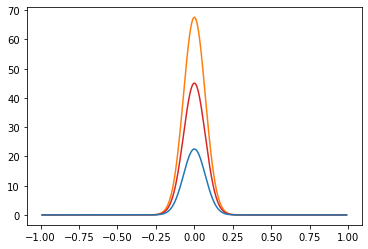

In [13]:
h_plt = [ h_tree([x, 0.0, 0.0]) for x in r_x ]

plt.plot(r_x, h_plt, "tab:orange")
plt.plot(r_x, g_plt, "tab:red")
plt.plot(r_x, f_plt, "tab:blue")

You can also check that the norm of the different trees makes sense. This is done by calling the `norm()` value of your tree, try printing it below using the print function. The `f_tree` should be normalized, so its norm should be about $1.0$

In [14]:
print(h_tree.norm())

3.0000000000000004


Try multiplying your trees with the `*` operator, it should return a new tree which is the product of both, and you can check its norm again.

In [15]:
i_tree = f_tree * g_tree

Finally, you can take the dot product, also called inner product, between two trees by using the `vp.dot` function. You can try this in the cell below.

In [16]:
vp.dot(g_tree, f_tree)

2.000000000000009


### 2.3 Applying an operator


Up until now you have seen the `vp.ScalingProjector`, which is a projection operator. Vampyr has more operators included into it, but the way you apply them is the same as the projection operator, they only differ in their initialization. Here are two other operators implemented in vampyr, the derivative operator `D` and the Helmholtz operator `H`. 

In [17]:
D = vp.DerivativeOperator(mra)
H = vp.HelmholtzOperator(mra, exp=1.0, prec=1.0e-4)

In this part we will work with the Derivative operator only. You will see the Helmholtz operator later. 

In [18]:
help(vp.DerivativeOperator)

Help on class DerivativeOperator in module vampyr._vampyr.vampyr3d:

class DerivativeOperator(pybind11_builtins.pybind11_object)
 |  Method resolution order:
 |      DerivativeOperator
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __call__(...)
 |      __call__(self: vampyr._vampyr.vampyr3d.DerivativeOperator, inp: mrcpp::FunctionTree<3>, axis: int = 0) -> mrcpp::FunctionTree<3>
 |  
 |  __init__(...)
 |      __init__(self: vampyr._vampyr.vampyr3d.DerivativeOperator, mra: mrcpp::MultiResolutionAnalysis<3>) -> None
 |  
 |  getOrder(...)
 |      getOrder(self: vampyr._vampyr.vampyr3d.DerivativeOperator) -> int
 |  
 |  ----------------------------------------------------------------------
 |  Static methods inherited from pybind11_builtins.pybind11_object:
 |  
 |  __new__(*args, **kwargs) from pybind11_builtins.pybind11_type
 |      Create and return a new object.  See help(type) for accurate signature.



In [ ]:
df = D(inp=f_tree, axis=0)

## 3 Quantum chemistry in Vampyr - The Hydrogen atom

In order to solve the KS equations in MWs we reformulate them in an integral form [1].

\begin{align}
    &\phi_i = -2\hat{G}_{\mu_i}\hat{V}\phi_i \\
\end{align}

Where $\hat{V}$ is the potential acting on the system, $\phi_i$ is the i-th KS orbital,   $\hat{G}$ is the Helmholtz integral operator, where its kernel is defined as 
\begin{align}
G_\mu(r - r') = \frac{\exp(-\mu |r - r'|)}{4\pi |r - r'|}
\end{align}
and $\mu$ is a parameter defined above through the orbital energies. The kinetic and orbital energies are included in $\hat{G}$. 

The Helmholtz operator is included in vampyr, which we saw when working with operators earlier, therefore the only things you need are the integral KS equation and the definition of $\mu$ 

\begin{equation}
     \mu_i = \sqrt{-2\epsilon_i}
\end{equation}

The way you initialize the Helmholtz operator is as follows
```
H = vp.HelmholtzOperator( mra, exp=mu, prec=eps )
```
where `mu` is the $\mu$ is the parameter defined above, mra you have seen before, and `eps` is the desired threshold precision. 

In this exercise you will be solving the KS equation iteratively for a simple system, the Hydrogen atom. This means that you only have the nuclear potential to take into account for the potential term in the KS equation.

\begin{align}
    V_{nuc}(\mathbf{r}) = -\frac{1}{|\mathbf{r}|}
\end{align}

We will also be working with a single orbital, of which the initial guess is

\begin{align}
    \phi_0(\mathbf{r}) = e^{-|\mathbf{r}|^2}
\end{align}
where 
\begin{align}
    |\mathbf{r}| = \sqrt{x^2 + y^2 + z^2}
\end{align}

The orbital update is defined as follows
\begin{align}
    \Delta\tilde{\phi}^n &= -2\hat{G}[V_{nuc}\phi^n] - \phi^n \\
    \Delta\tilde{\phi}^n &= \tilde{\phi}^{n+1} - \phi^n
\end{align}
where we use \~ to denote a function that is **not** normalized, and $n$ is the iteration index.

The energy update is then defined by
\begin{align}
    \Delta \epsilon^n = \frac{<\Delta\tilde{\phi}^n|V\phi_n>}{||\tilde{\phi}^{n+1}||}
\end{align}

What you need to do in this exercise is
1. Make a nuclear potential as a python function
2. Make an initial guess for the orbital as a python function
3. Project both nuclear potential and orbital through vampyr
4. Create a Helmholtz operator with $\mu$ as shown above, use an initial guess for $\epsilon$
5. Compute the orbital update through application of the Helmholtz operator
6. Compute the energy update
7. Repeat steps 4-6 until your orbital energies have converged

The convergence criterion is the norm of $\Delta \phi^n$, but you should start by looping a set amount of times before trying the thershold.

iteration: 0   Energy: -0.3538784995815104   Norm: 1.0169878647963146   Update: 0.3658744875832451
iteration: 1   Energy: -0.45586277932224994   Norm: 1.2743893792986252   Update: 0.3761830430773537
iteration: 2   Energy: -0.49658385257177423   Norm: 1.0741995283703158   Update: 0.08944544671888827
iteration: 3   Energy: -0.4999674305621767   Norm: 1.0065411823526482   Update: 0.008474863789213383
iteration: 4   Energy: -0.5000029718920682   Norm: 1.0007449220333176   Update: 0.001437345608757804
iteration: 5   Energy: -0.5000046219839579   Norm: 1.0003471833910549   Update: 0.0006592977194034118


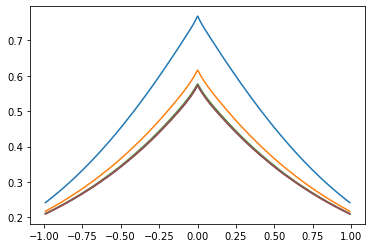

In [1]:
from vampyr import vampyr3d as vp
import numpy as np
import matplotlib.pyplot as plt

r_x = np.linspace(-0.99, 0.99, 1000) # create an evenly spaced set of points between -0.99 and 0.99
r_y = np.zeros(1000)
r_z = np.zeros(1000)
r = [r_x, r_y, r_z]

# Analytic nuclear potential
def f_nuc(r):
    R = np.sqrt(r[0]*r[0] + r[1]*r[1] + r[2]*r[2])
    return -1.0 / R

# Analytic guess for solution
def f_phi(r):
    R = np.sqrt(r[0]*r[0] + r[1]*r[1] + r[2]*r[2])
    return np.exp(-R*R)


# Global parameters
k = 7                        # Polynomial order
L = [-20,20]                 # Simulation box size
epsilon = 1.0e-4             # Relative precision

# Define MRA and multiwavelet projector
MRA = vp.MultiResolutionAnalysis(order=k, box=L)
P_eps = vp.ScalingProjector(mra=MRA, prec=epsilon)

# Project analytic nuclear potential
V_nuc = P_eps(f_nuc)

# Initial guess for energy and orbital
E_n = -0.5
phi_n = P_eps(f_phi)
phi_n.normalize()

# Minimization loop
thrs = 1.0e-3
update = 1.0
i = 0
while (update > thrs or i > 100):
    # Prepare Helmholtz operator
    mu = np.sqrt(-2*E_n)
    H = vp.HelmholtzOperator(mra=MRA, exp=mu, prec=epsilon)
    
    # Apply Helmholtz operator
    Vphi = V_nuc * phi_n
    phi_np1 = -2*H(Vphi)
    norm = phi_np1.norm()
    
    # Compute orbital and energy updates
    dPhi_n = phi_np1 - phi_n
    dE_n = vp.dot(Vphi, dPhi_n)/phi_np1.squaredNorm()
    update = dPhi_n.norm()
    
    # Prepare for next iteration
    E_n += dE_n
    phi_n += dPhi_n
    phi_n.normalize()
    phi_n.crop(epsilon)
    
    phi_n_plt = [phi_n([x, 0.0, 0.0]) for x in r_x]
    plt.plot(r_x, phi_n_plt)
    
    print("iteration: {}   Energy: {}   Norm: {}   Update: {}".format(i, E_n, norm, update))
    i += 1

plt.show()


## 4 Beyond today

If you managed all the exercises up to now, congratulations! if not, go back and do them! 

These following exercises are optional, but will give you a bit more knowledge about working in multiwavelets. 

I don't know if I want to add more than this right now


## 5 Sources


[1] Stig Rune Jensen, Santanu Saha, José A. Flores-Livas, William Huhn, Volker Blum, Stefan Goedecker, and Luca Frediani The Elephant in the Room of Density Functional Theory Calculations. The Journal of Physical Chemistry Letters 2017 8 (7), 1449-1457
DOI: 10.1021/acs.jpclett.7b00255
